In [1]:
# Core Python libraries (built-in, no installation needed)
import datetime      # Handle dates and times
import json          # Work with JSON data
import logging       # Control error messages
import os            # Access environment variables and file system
import sys           # System-specific parameters
from getpass import getpass  # Securely input passwords (hidden)
from pathlib import Path     # Modern file path handling

# External packages (need installation)
import readchar      # Read single keypress (for menu navigation)
import requests      # Make HTTP requests (used by garminconnect)
from garth.exc import GarthException, GarthHTTPError  # Handle auth errors

# The main Garmin Connect library
from garminconnect import (
    Garmin,                                    # Main API class
    GarminConnectAuthenticationError,          # Login errors
    GarminConnectConnectionError,              # Network errors
    GarminConnectTooManyRequestsError,        # Rate limit errors
)

In [6]:
# Cell 1: Imports
from garminconnect import Garmin
from datetime import date
import json
import pandas as pd

# Cell 2: Login and setup
api = Garmin("bogdanbirgovan@gmail.com", "!Lebonprize1")
api.login()
today = date.today()
print(f"Connected! Today's date: {today}")

# Cell 3: Get heart rate data
heart_data = api.get_heart_rates(today.isoformat())

# Cell 4: View the raw data (pretty printed)
# In Jupyter, you can just display the variable
print(json.dumps(heart_data, indent=2))

# Cell 5: Explore the structure
# See what type of data it is
print(f"Data type: {type(heart_data)}")
print(f"\nAvailable fields/keys:")
print(list(heart_data.keys()))

# Cell 6: Display specific fields
# In Jupyter, just put the variable at the end to display it nicely
heart_data

# Cell 7: Extract specific values
if 'restingHeartRate' in heart_data:
    print(f"Resting HR: {heart_data['restingHeartRate']}")

# Show all values in a more readable way
for key, value in heart_data.items():
    print(f"{key}: {value}")

# Cell 8 (Optional): Convert to DataFrame for better visualization
# This works great if heart_data is a dictionary
df = pd.DataFrame([heart_data])
df

# Or if you want to see it transposed (fields as rows)
df.T

Connected! Today's date: 2025-10-21
{
  "userProfilePK": 89635332,
  "calendarDate": "2025-10-21",
  "startTimestampGMT": "2025-10-20T22:00:00.0",
  "endTimestampGMT": "2025-10-21T16:15:00.0",
  "startTimestampLocal": "2025-10-21T00:00:00.0",
  "endTimestampLocal": "2025-10-22T00:00:00.0",
  "maxHeartRate": 143,
  "minHeartRate": 59,
  "restingHeartRate": 63,
  "lastSevenDaysAvgRestingHeartRate": 85,
  "heartRateValueDescriptors": [
    {
      "key": "timestamp",
      "index": 0
    },
    {
      "key": "heartrate",
      "index": 1
    }
  ],
  "heartRateValues": [
    [
      1760997600000,
      null
    ],
    [
      1761020520000,
      107
    ],
    [
      1761020640000,
      110
    ],
    [
      1761020760000,
      105
    ],
    [
      1761020880000,
      108
    ],
    [
      1761021000000,
      103
    ],
    [
      1761021120000,
      90
    ],
    [
      1761021240000,
      91
    ],
    [
      1761021360000,
      84
    ],
    [
      1761021480000,
   

,0
userProfilePK,89635332
calendarDate,2025-10-21
startTimestampGMT,2025-10-20T22:00:00.0
endTimestampGMT,2025-10-21T16:15:00.0
startTimestampLocal,2025-10-21T00:00:00.0
endTimestampLocal,2025-10-22T00:00:00.0
maxHeartRate,143
minHeartRate,59
restingHeartRate,63
lastSevenDaysAvgRestingHeartRate,85


In [8]:
from IPython.display import JSON

# This creates an interactive, collapsible JSON viewer
JSON(heart_data)

<IPython.core.display.JSON object>

In [9]:
# Cell: Simple summary - just the key numbers
print("📊 Heart Rate Summary for Today")
print("=" * 40)
print(f"Resting Heart Rate: {heart_data['restingHeartRate']} bpm")
print(f"Max Heart Rate: {heart_data['maxHeartRate']} bpm")
print(f"Min Heart Rate: {heart_data['minHeartRate']} bpm")
print(f"7-Day Avg Resting HR: {heart_data['lastSevenDaysAvgRestingHeartRate']} bpm")
print(f"\nTotal measurements today: {len(heart_data['heartRateValues'])}")

📊 Heart Rate Summary for Today
Resting Heart Rate: 63 bpm
Max Heart Rate: 143 bpm
Min Heart Rate: 59 bpm
7-Day Avg Resting HR: 85 bpm

Total measurements today: 290


In [12]:
# Cell: View the time-series data as a DataFrame
import pandas as pd
from datetime import datetime

# Convert the list of measurements to DataFrame
hr_df = pd.DataFrame(
    heart_data['heartRateValues'],
    columns=['timestamp', 'heart_rate']
)

# Convert timestamp from milliseconds to readable datetime
hr_df['datetime'] = pd.to_datetime(hr_df['timestamp'], unit='ms')

# Remove null values
hr_df = hr_df[hr_df['heart_rate'].notna()]

# Show first 10 rows
print(f"First 10 heart rate measurements:")
display(hr_df[['datetime', 'heart_rate']].head(200))

# Calculate some stats from the detailed data
print(f"\n📈 Calculated from {len(hr_df)} measurements:")
print(f"Average HR: {hr_df['heart_rate'].mean():.1f} bpm")
print(f"Median HR: {hr_df['heart_rate'].median():.1f} bpm")

First 10 heart rate measurements:


,datetime,heart_rate
1,2025-10-21 04:22:00,107.0
2,2025-10-21 04:24:00,110.0
3,2025-10-21 04:26:00,105.0
4,2025-10-21 04:28:00,108.0
5,2025-10-21 04:30:00,103.0
...,...,...
197,2025-10-21 11:08:00,67.0
198,2025-10-21 11:10:00,69.0
199,2025-10-21 11:12:00,67.0
200,2025-10-21 11:14:00,68.0



📈 Calculated from 288 measurements:
Average HR: 80.4 bpm
Median HR: 71.5 bpm


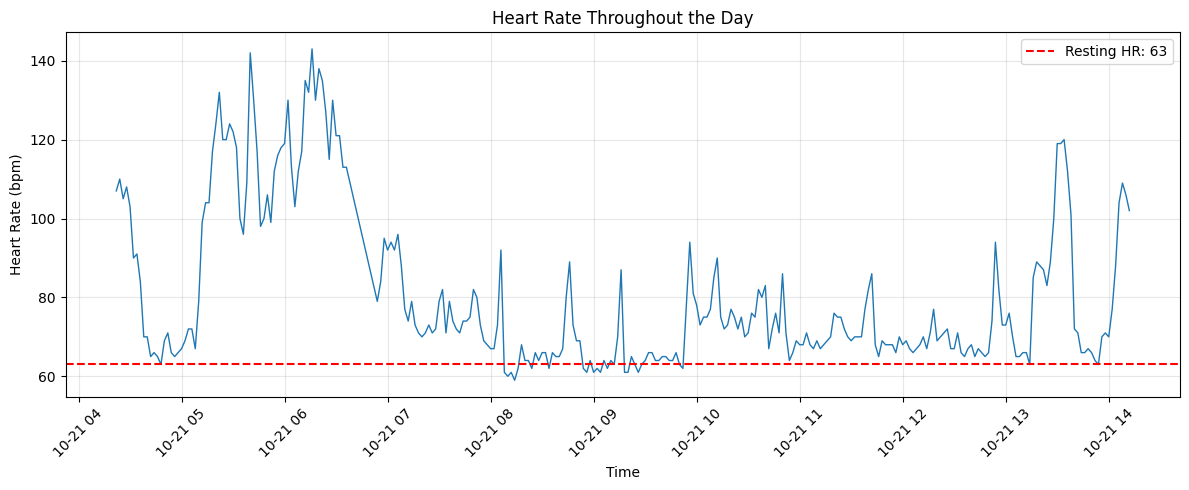

In [18]:
# Cell: Plot heart rate over time
import matplotlib.pyplot as plt

# Convert the data (from above)
hr_df = pd.DataFrame(
    heart_data['heartRateValues'],
    columns=['timestamp', 'heart_rate']
)
hr_df['datetime'] = pd.to_datetime(hr_df['timestamp'], unit='ms')
hr_df = hr_df[hr_df['heart_rate'].notna()]

# Create plot
plt.figure(figsize=(12, 5))
plt.plot(hr_df['datetime'], hr_df['heart_rate'], linewidth=1)
plt.axhline(y=heart_data['restingHeartRate'], color='r', linestyle='--', 
            label=f'Resting HR: {heart_data["restingHeartRate"]}')
plt.title('Heart Rate Throughout the Day')
plt.xlabel('Time')
plt.ylabel('Heart Rate (bpm)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
# Cell: Check current timezone
import pandas as pd

# Convert a timestamp
hr_df = pd.DataFrame(
    heart_data['heartRateValues'],
    columns=['timestamp', 'heart_rate']
)
hr_df['datetime'] = pd.to_datetime(hr_df['timestamp'], unit='ms')

print("First timestamp in data:")
print(f"Raw: {hr_df['datetime'].iloc[1]}")
print(f"Timezone: {hr_df['datetime'].iloc[1].tz}")
print(f"\nYour Garmin data shows:")
print(f"GMT start: {heart_data['startTimestampGMT']}")
print(f"Local start: {heart_data['startTimestampLocal']}")

First timestamp in data:
Raw: 2025-10-21 04:22:00
Timezone: None

Your Garmin data shows:
GMT start: 2025-10-20T22:00:00.0
Local start: 2025-10-21T00:00:00.0


In [21]:
# Cell: Interactive plot with CORRECT timezone
import plotly.graph_objects as go
import pandas as pd

# Convert the data
hr_df = pd.DataFrame(
    heart_data['heartRateValues'],
    columns=['timestamp', 'heart_rate']
)

# Convert to datetime in UTC, then to Copenhagen time
hr_df['datetime'] = pd.to_datetime(hr_df['timestamp'], unit='ms', utc=True)
hr_df['datetime'] = hr_df['datetime'].dt.tz_convert('Europe/Copenhagen')

# Remove nulls
hr_df = hr_df[hr_df['heart_rate'].notna()]

print(f"Timezone: {hr_df['datetime'].iloc[0].tz}")
print(f"First measurement: {hr_df['datetime'].iloc[0]}")
print(f"Last measurement: {hr_df['datetime'].iloc[-1]}")

# Create figure
fig = go.Figure()

# Add heart rate line
fig.add_trace(go.Scatter(
    x=hr_df['datetime'],
    y=hr_df['heart_rate'],
    mode='lines',
    name='Heart Rate',
    line=dict(color='#FF6B6B', width=2),
    hovertemplate='<b>Time:</b> %{x|%H:%M}<br><b>HR:</b> %{y} bpm<extra></extra>'
))

# Add resting heart rate reference line
fig.add_hline(
    y=heart_data['restingHeartRate'],
    line_dash="dash",
    line_color="green",
    annotation_text=f"Resting HR: {heart_data['restingHeartRate']} bpm",
    annotation_position="right"
)

# Update layout
fig.update_layout(
    title='Heart Rate Throughout the Day (Copenhagen Time)',
    xaxis_title='Time',
    yaxis_title='Heart Rate (bpm)',
    hovermode='x unified',
    template='plotly_white',
    height=500,
)

fig.show()

Timezone: Europe/Copenhagen
First measurement: 2025-10-21 06:22:00+02:00
Last measurement: 2025-10-21 16:12:00+02:00


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [27]:
# Cell: Complete Heart Rate Data Collection Script
import pandas as pd
from datetime import date, timedelta
from garminconnect import Garmin
import time

# ===== CONFIGURATION =====
api = Garmin("bogdanbirgovan@gmail.com", "!Lebonprize1")
api.login()

# Date range to collect
end_date = date.today()
start_date = end_date - timedelta(days=30)  # Last 30 days
print(f"📅 Collecting data from {start_date} to {end_date}")

# Output file names
summary_file = 'heart_rate_daily_summary.csv'
detailed_file = 'heart_rate_detailed.csv'

# ===== HELPER FUNCTION =====
def extract_heart_rate_data(heart_data, date_str):
    """Extract both summary and time-series heart rate data"""
    
    # 1. SUMMARY DATA (one row per day)
    summary = {
        'date': date_str,
        'resting_hr': heart_data.get('restingHeartRate'),
        'max_hr': heart_data.get('maxHeartRate'),
        'min_hr': heart_data.get('minHeartRate'),
        '7day_avg_resting_hr': heart_data.get('lastSevenDaysAvgRestingHeartRate'),
    }
    
    # 2. TIME-SERIES DATA (many rows per day)
    if 'heartRateValues' in heart_data and heart_data['heartRateValues']:
        hr_df = pd.DataFrame(
            heart_data['heartRateValues'],
            columns=['timestamp', 'heart_rate']
        )
        
        # Convert and clean
        hr_df['datetime'] = pd.to_datetime(hr_df['timestamp'], unit='ms', utc=True)
        hr_df['datetime'] = hr_df['datetime'].dt.tz_convert('Europe/Copenhagen')
        hr_df = hr_df[hr_df['heart_rate'].notna()].copy()
        
        # Add useful time columns
        hr_df['date'] = date_str
        hr_df['hour'] = hr_df['datetime'].dt.hour
        hr_df['time_period'] = pd.cut(
            hr_df['hour'], 
            bins=[0, 6, 12, 18, 24],
            labels=['Night', 'Morning', 'Afternoon', 'Evening']
        )
        
        # Calculate derived metrics
        if len(hr_df) > 0:
            daytime = hr_df[hr_df['hour'].between(6, 22)]
            nighttime = hr_df[~hr_df['hour'].between(6, 22)]
            
            summary['avg_hr_daytime'] = daytime['heart_rate'].mean() if len(daytime) > 0 else None
            summary['avg_hr_nighttime'] = nighttime['heart_rate'].mean() if len(nighttime) > 0 else None
            summary['hr_variability'] = hr_df['heart_rate'].std()
            summary['total_measurements'] = len(hr_df)
        else:
            summary['avg_hr_daytime'] = None
            summary['avg_hr_nighttime'] = None
            summary['hr_variability'] = None
            summary['total_measurements'] = 0
    else:
        hr_df = pd.DataFrame()  # Empty dataframe
        summary['avg_hr_daytime'] = None
        summary['avg_hr_nighttime'] = None
        summary['hr_variability'] = None
        summary['total_measurements'] = 0
    
    return summary, hr_df


# ===== MAIN COLLECTION LOOP =====
all_summaries = []
all_detailed = []

current_date = start_date
while current_date <= end_date:
    date_str = current_date.isoformat()
    
    try:
        print(f"📥 Fetching data for {date_str}...", end=' ')
        
        # Get heart rate data from Garmin
        heart_data = api.get_heart_rates(date_str)
        
        # Extract the data
        summary, detailed = extract_heart_rate_data(heart_data, date_str)
        
        # Append to collections
        all_summaries.append(summary)
        if len(detailed) > 0:
            all_detailed.append(detailed)
        
        print(f"✅ {summary['total_measurements']} measurements")
        
        # Be nice to Garmin's servers
        time.sleep(1)
        
    except Exception as e:
        print(f"❌ Error: {e}")
        all_summaries.append({
            'date': date_str,
            'resting_hr': None,
            'max_hr': None,
            'min_hr': None,
            '7day_avg_resting_hr': None,
            'avg_hr_daytime': None,
            'avg_hr_nighttime': None,
            'hr_variability': None,
            'total_measurements': 0
        })
    
    # Move to next day
    current_date += timedelta(days=1)


# ===== SAVE TO CSV =====
print("\n💾 Saving data to CSV files...")

# 1. Save summary data
summary_df = pd.DataFrame(all_summaries)
summary_df.to_csv(summary_file, index=False)
print(f"✅ Summary saved: {summary_file} ({len(summary_df)} days)")

# 2. Save detailed data
if all_detailed:
    detailed_df = pd.concat(all_detailed, ignore_index=True)
    # Keep only the columns we want
    detailed_df = detailed_df[['datetime', 'date', 'heart_rate', 'hour', 'time_period']]
    detailed_df.to_csv(detailed_file, index=False)
    print(f"✅ Detailed data saved: {detailed_file} ({len(detailed_df)} measurements)")
else:
    print("⚠️ No detailed data to save")

print("\n🎉 Data collection complete!")


📅 Collecting data from 2025-09-21 to 2025-10-21
📥 Fetching data for 2025-09-21... ✅ 83 measurements
📥 Fetching data for 2025-09-22... ✅ 111 measurements
📥 Fetching data for 2025-09-23... ✅ 321 measurements
📥 Fetching data for 2025-09-24... ✅ 154 measurements
📥 Fetching data for 2025-09-25... ✅ 37 measurements
📥 Fetching data for 2025-09-26... ✅ 105 measurements
📥 Fetching data for 2025-09-27... ✅ 317 measurements
📥 Fetching data for 2025-09-28... ✅ 39 measurements
📥 Fetching data for 2025-09-29... ✅ 132 measurements
📥 Fetching data for 2025-09-30... ✅ 233 measurements
📥 Fetching data for 2025-10-01... ✅ 6 measurements
📥 Fetching data for 2025-10-02... ✅ 0 measurements
📥 Fetching data for 2025-10-03... ✅ 190 measurements
📥 Fetching data for 2025-10-04... ✅ 0 measurements
📥 Fetching data for 2025-10-05... ✅ 0 measurements
📥 Fetching data for 2025-10-06... ✅ 316 measurements
📥 Fetching data for 2025-10-07... ✅ 0 measurements
📥 Fetching data for 2025-10-08... ✅ 266 measurements
📥 Fetching 

In [28]:
# Cell: Complete Heart Rate Data Collection Script (with secure login)
import pandas as pd
from datetime import date, timedelta
from garminconnect import Garmin
import time
import os
from getpass import getpass

# ===== SECURE LOGIN =====
tokenstore = os.path.expanduser("~/.garminconnect")

try:
    print(f"Attempting login with stored tokens...")
    api = Garmin()
    api.login(tokenstore)
    print("✅ Logged in with stored tokens!")
except Exception:
    print("Please enter your Garmin credentials:")
    email = input("Email: ")
    password = getpass("Password: ")
    
    api = Garmin(email, password)
    api.login()
    api.garth.dump(tokenstore)
    print(f"✅ Login successful! Tokens saved for future use.")

# ===== CONFIGURATION =====
# Date range to collect
end_date = date.today()
start_date = end_date - timedelta(days=30)  # Last 30 days
print(f"📅 Collecting data from {start_date} to {end_date}")

# Output file names
summary_file = 'heart_rate_daily_summary.csv'
detailed_file = 'heart_rate_detailed.csv'

# ===== HELPER FUNCTION =====
def extract_heart_rate_data(heart_data, date_str):
    """Extract both summary and time-series heart rate data"""
    
    # 1. SUMMARY DATA (one row per day)
    summary = {
        'date': date_str,
        'resting_hr': heart_data.get('restingHeartRate'),
        'max_hr': heart_data.get('maxHeartRate'),
        'min_hr': heart_data.get('minHeartRate'),
        'avg_7day_resting_hr': heart_data.get('lastSevenDaysAvgRestingHeartRate'),
    }
    
    # 2. TIME-SERIES DATA (many rows per day)
    if 'heartRateValues' in heart_data and heart_data['heartRateValues']:
        hr_df = pd.DataFrame(
            heart_data['heartRateValues'],
            columns=['timestamp', 'heart_rate']
        )
        
        # Convert and clean
        hr_df['datetime'] = pd.to_datetime(hr_df['timestamp'], unit='ms', utc=True)
        hr_df['datetime'] = hr_df['datetime'].dt.tz_convert('Europe/Copenhagen')
        hr_df = hr_df[hr_df['heart_rate'].notna()].copy()
        
        # Add useful time columns
        hr_df['date'] = date_str
        hr_df['hour'] = hr_df['datetime'].dt.hour
        hr_df['time_period'] = pd.cut(
            hr_df['hour'], 
            bins=[0, 6, 12, 18, 24],
            labels=['Night', 'Morning', 'Afternoon', 'Evening']
        )
        
        # Calculate derived metrics
        if len(hr_df) > 0:
            daytime = hr_df[hr_df['hour'].between(6, 22)]
            nighttime = hr_df[~hr_df['hour'].between(6, 22)]
            
            summary['avg_hr_daytime'] = daytime['heart_rate'].mean() if len(daytime) > 0 else None
            summary['avg_hr_nighttime'] = nighttime['heart_rate'].mean() if len(nighttime) > 0 else None
            summary['hr_variability'] = hr_df['heart_rate'].std()
            summary['total_measurements'] = len(hr_df)
        else:
            summary['avg_hr_daytime'] = None
            summary['avg_hr_nighttime'] = None
            summary['hr_variability'] = None
            summary['total_measurements'] = 0
    else:
        hr_df = pd.DataFrame()  # Empty dataframe
        summary['avg_hr_daytime'] = None
        summary['avg_hr_nighttime'] = None
        summary['hr_variability'] = None
        summary['total_measurements'] = 0
    
    return summary, hr_df


# ===== MAIN COLLECTION LOOP =====
all_summaries = []
all_detailed = []

current_date = start_date
while current_date <= end_date:
    date_str = current_date.isoformat()
    
    try:
        print(f"📥 Fetching data for {date_str}...", end=' ')
        
        # Get heart rate data from Garmin
        heart_data = api.get_heart_rates(date_str)
        
        # Extract the data
        summary, detailed = extract_heart_rate_data(heart_data, date_str)
        
        # Append to collections
        all_summaries.append(summary)
        if len(detailed) > 0:
            all_detailed.append(detailed)
        
        print(f"✅ {summary['total_measurements']} measurements")
        
        # Be nice to Garmin's servers
        time.sleep(1)
        
    except Exception as e:
        print(f"❌ Error: {e}")
        all_summaries.append({
            'date': date_str,
            'resting_hr': None,
            'max_hr': None,
            'min_hr': None,
            'avg_7day_resting_hr': None,
            'avg_hr_daytime': None,
            'avg_hr_nighttime': None,
            'hr_variability': None,
            'total_measurements': 0
        })
    
    # Move to next day
    current_date += timedelta(days=1)


# ===== SAVE TO CSV =====
print("\n💾 Saving data to CSV files...")

# 1. Save summary data
summary_df = pd.DataFrame(all_summaries)
summary_df.to_csv(summary_file, index=False)
print(f"✅ Summary saved: {summary_file} ({len(summary_df)} days)")

# 2. Save detailed data
if all_detailed:
    detailed_df = pd.concat(all_detailed, ignore_index=True)
    # Keep only the columns we want
    detailed_df = detailed_df[['datetime', 'date', 'heart_rate', 'hour', 'time_period']]
    detailed_df.to_csv(detailed_file, index=False)
    print(f"✅ Detailed data saved: {detailed_file} ({len(detailed_df)} measurements)")
else:
    print("⚠️ No detailed data to save")

print("\n🎉 Data collection complete!")

Attempting login with stored tokens...
✅ Logged in with stored tokens!
📅 Collecting data from 2025-09-21 to 2025-10-21
📥 Fetching data for 2025-09-21... ✅ 83 measurements
📥 Fetching data for 2025-09-22... ✅ 111 measurements
📥 Fetching data for 2025-09-23... ✅ 321 measurements
📥 Fetching data for 2025-09-24... ✅ 154 measurements
📥 Fetching data for 2025-09-25... ✅ 37 measurements
📥 Fetching data for 2025-09-26... ✅ 105 measurements
📥 Fetching data for 2025-09-27... ✅ 317 measurements
📥 Fetching data for 2025-09-28... ✅ 39 measurements
📥 Fetching data for 2025-09-29... ✅ 132 measurements
📥 Fetching data for 2025-09-30... ✅ 233 measurements
📥 Fetching data for 2025-10-01... ✅ 6 measurements
📥 Fetching data for 2025-10-02... ✅ 0 measurements
📥 Fetching data for 2025-10-03... ✅ 190 measurements
📥 Fetching data for 2025-10-04... ✅ 0 measurements
📥 Fetching data for 2025-10-05... ✅ 0 measurements
📥 Fetching data for 2025-10-06... ✅ 316 measurements
📥 Fetching data for 2025-10-07... ✅ 0 measur

PermissionError: [Errno 13] Permission denied: 'heart_rate_daily_summary.csv'